In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
bio_df      = pd.read_csv("../Olympic_data/Olympic_Athlete_Bio_Clean.csv")
event_df    = pd.read_csv("../Olympic_data/Olympic_Athlete_Event_Results_Clean.csv")
result_df   = pd.read_csv("../Olympic_data/Olympic_Results.csv")
game_df     = pd.read_csv("../Olympic_data/Olympics_Games.csv")
country_df  = pd.read_csv("../Olympic_data/Olympics_Country.csv")
medal_df    = pd.read_csv("../Olympic_data/Olympic_Games_Medal_Tally.csv")

In [3]:
del bio_df["Unnamed: 0"]

In [4]:
event_df = event_df.loc[event_df["sport"] == "Swimming"]
del event_df["Unnamed: 0"]

In [5]:
swimBioEvent_df = pd.merge(bio_df,event_df,on="athlete_id")
swimBioEvent_df
swimNotTeam_df = swimBioEvent_df.loc[swimBioEvent_df["isTeamSport"] == False]
swimNotTeam_df = swimNotTeam_df.loc[swimNotTeam_df["weight"] != "58-73"]
swimNotTeam_df = swimNotTeam_df.loc[swimNotTeam_df["weight"] != "75-80"]
swimNotTeam_df["BMI"] = swimNotTeam_df["weight"].astype(float)/((swimNotTeam_df["height"]/100)**2)
swimMedal = swimNotTeam_df[["medal","BMI","height","weight"]]
swimMedal["weight"] = swimMedal["weight"].astype(float)
swimMedalMean = swimMedal.groupby("medal").mean()
swimMedalMax = swimMedal.groupby("medal").max()
swimMedalMin = swimMedal.groupby("medal").min()
swimMedal2 = pd.merge(swimMedalMean,swimMedalMax,on="medal")
swimMedal2 = pd.merge(swimMedal2,swimMedalMin,on="medal")
swimMedal2 = swimMedal2.rename(columns={"BMI_x":"BMI Mean","height_x":"Height Mean","weight_x":"Weight Mean","BMI_y":"BMI Max","height_y":"Height Max","weight_y":"Weight Max","BMI":"BMI Min","height":"Height Min","weight":"Weight Min"})
swimMedal2

C:\Users\kylec\AppData\Local\Temp\ipykernel_41052\3313942795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimMedal["weight"] = swimMedal["weight"].astype(float)


,BMI Mean,Height Mean,Weight Mean,BMI Max,Height Max,Weight Max,BMI Min,Height Min,Weight Min
medal,,,,,,,,,
Bronze,22.103944,179.250660,71.403694,38.954294,203.0,104.0,17.916331,150.0,48.0
Gold,22.115305,181.164062,73.028646,28.125000,203.0,105.0,17.855321,159.0,49.0
Silver,22.143535,180.841969,72.813472,38.954294,203.0,105.0,17.577069,152.0,48.0


Best fit slope = 27.74
SEM value for BMI is 0.06
SEM value for weight is 0.34


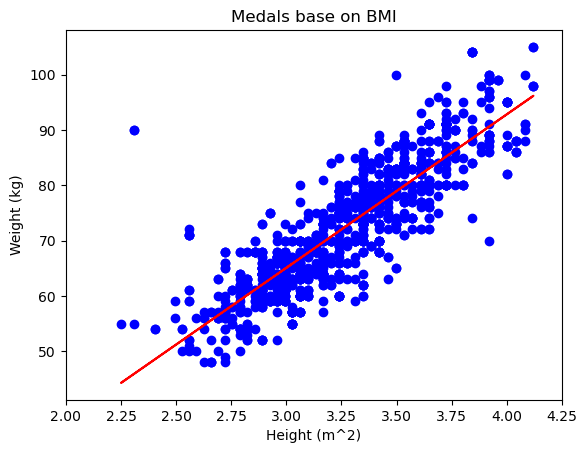

In [64]:
x = swimMedal["weight"]
y = (swimMedal["height"]/100)**2
s,b,rv,pv,ster = st.linregress(y,x)
fit = s*y + b

plt.scatter(x=y,y=x,c='blue')
plt.plot(y,fit,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI")
plt.xlim(2,4.25)
print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimMedal["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimMedal["weight"]),2)}")
plt.show()

Best fit slope = 28.77
SEM value for BMI is 0.1
SEM value for weight is 0.6


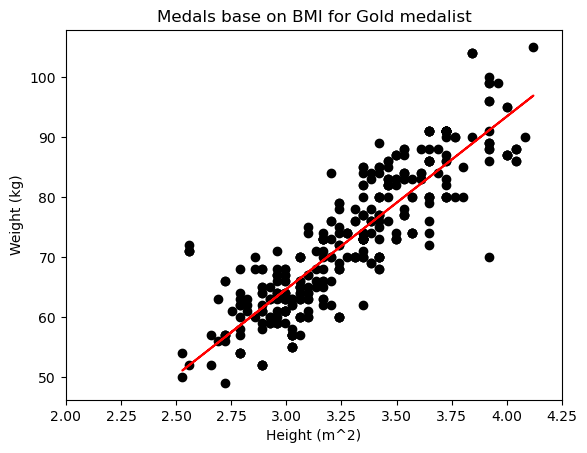

In [63]:
swimGold = swimMedal.loc[swimMedal["medal"] == "Gold"]
xG = swimGold["weight"]
yG = (swimGold["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yG,xG)
fitG = s*yG + b

plt.scatter(x=yG,y=xG,c='black')
plt.plot(yG,fitG,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI for Gold medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimGold["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimGold["weight"]),2)}")
plt.show()


Best fit slope = 27.66
SEM value for BMI is 0.1
SEM value for weight is 0.58


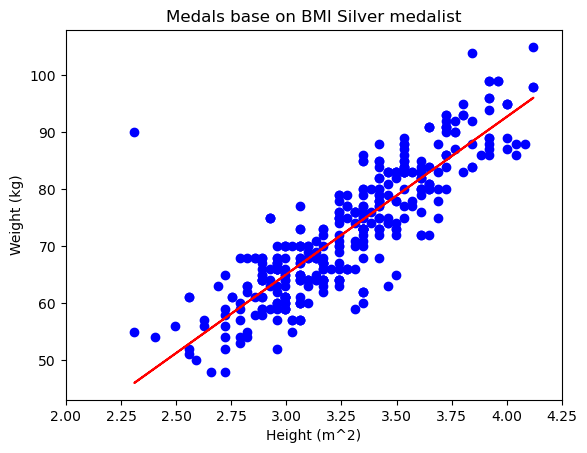

In [62]:
swimSilv = swimMedal.loc[swimMedal["medal"] == "Silver"]
xS = swimSilv["weight"]
yS = (swimSilv["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yS,xS)
fitS = s*yS + b

plt.scatter(x=yS,y=xS,c='blue')
plt.plot(yS,fitS,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Silver medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimSilv["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimSilv["weight"]),2)}")
plt.show()

Best fit slope = 26.89
SEM value for BMI is 0.11
SEM value for weight is 0.59


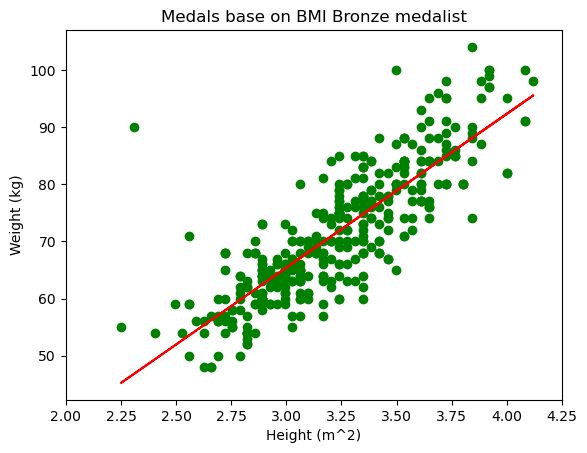

In [61]:
swimBron = swimMedal.loc[swimMedal["medal"] == "Bronze"]
xB = swimBron["weight"]
yB = (swimBron["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yB,xB)
fitB = s*yB + b

plt.scatter(x=yB,y=xB,c='green')
plt.plot(yB,fitB,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Bronze medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimBron["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimBron["weight"]),2)}")
plt.show()

Best fit slope = 28.78
SEM value for BMI is 0.05
SEM value for weight is 0.34


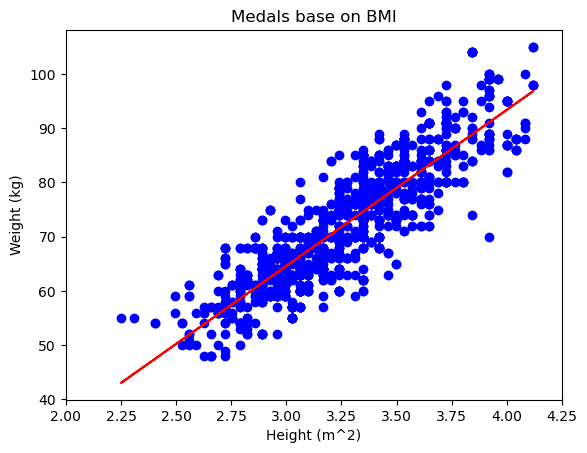

In [60]:
mean = swimMedal["BMI"].mean()
Q1 = swimMedal["BMI"].quantile(0.25)
Q3 = swimMedal["BMI"].quantile(0.75)
IQR = Q3 - Q1

inSwimMedal = swimMedal.loc[(swimMedal["BMI"] >= Q1 - 1.5*IQR)&(swimMedal["BMI"] <= Q3 + 1.5*IQR)]
x = inSwimMedal["weight"]
y = (inSwimMedal["height"]/100)**2
s,b,rv,pv,ster = st.linregress(y,x)
fit = s*y + b

plt.scatter(x=y,y=x,c='blue')
plt.plot(y,fit,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(inSwimMedal["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(inSwimMedal["weight"]),2)}")
plt.show()


Best fit slope = 30.02
SEM value for BMI is 0.09
SEM value for weight is 0.6


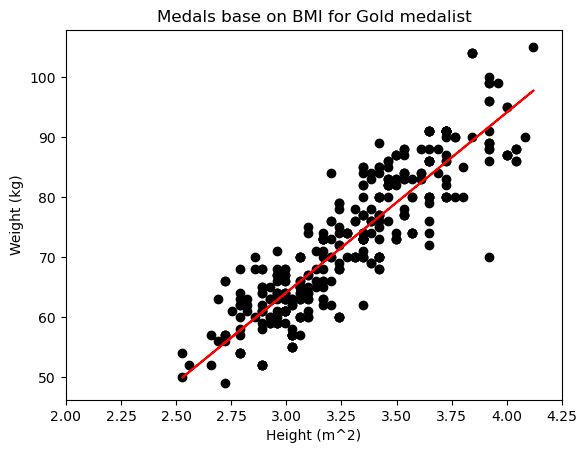

In [58]:
swimGold = inSwimMedal.loc[inSwimMedal["medal"] == "Gold"]
xG = swimGold["weight"]
yG = (swimGold["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yG,xG)
fitG = s*yG + b

plt.scatter(x=yG,y=xG,c='black')
plt.plot(yG,fitG,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI for Gold medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimGold["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimGold["weight"]),2)}")
plt.show()

Best fit slope = 28.57
SEM value for BMI is 0.09
SEM value for weight is 0.58


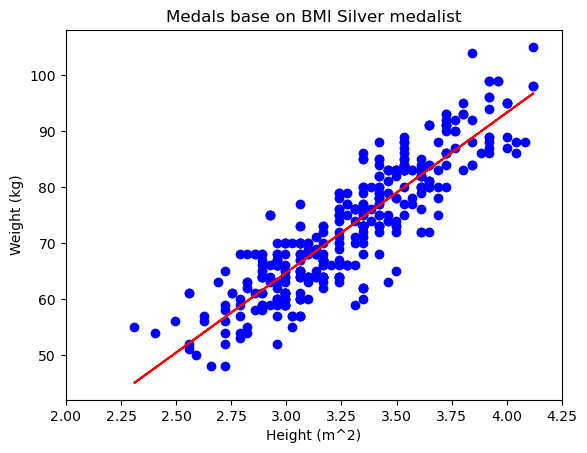

In [57]:
swimSilv = inSwimMedal.loc[inSwimMedal["medal"] == "Silver"]
xS = swimSilv["weight"]
yS = (swimSilv["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yS,xS)
fitS = s*yS + b

plt.scatter(x=yS,y=xS,c='blue')
plt.plot(yS,fitS,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Silver medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimSilv["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimSilv["weight"]),2)}")
plt.show()

Best fit slope = 27.86
SEM value for BMI is 0.1
SEM value for weight is 0.59


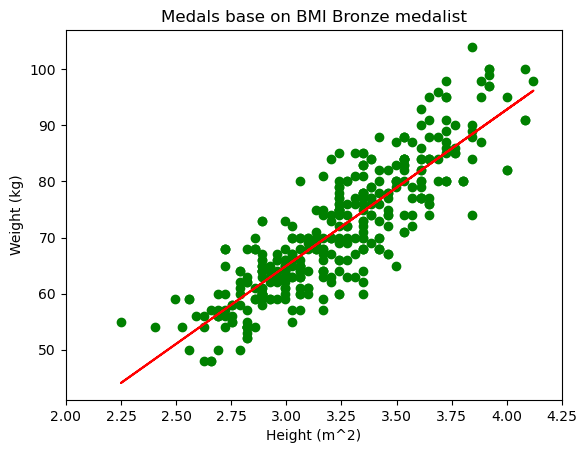

In [56]:
swimBron = inSwimMedal.loc[inSwimMedal["medal"] == "Bronze"]
xB = swimBron["weight"]
yB = (swimBron["height"]/100)**2
s,b,rv,pv,ster = st.linregress(yB,xB)
fitB = s*yB + b

plt.scatter(x=yB,y=xB,c='green')
plt.plot(yB,fitB,'r-')
plt.ylabel("Weight (kg)")
plt.xlabel("Height (m^2)")
plt.title("Medals base on BMI Bronze medalist")
plt.xlim(2,4.25)

print(f"Best fit slope = {round(s,2)}")
print(f"SEM value for BMI is {round(st.sem(swimBron["BMI"]),2)}")
print(f"SEM value for weight is {round(st.sem(swimBron["weight"]),2)}")
plt.show()